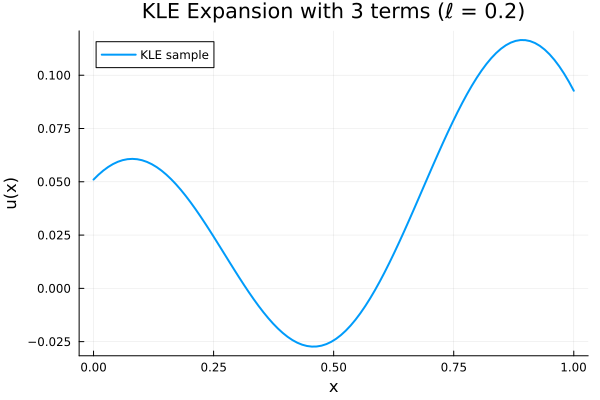

In [1]:
using LinearAlgebra, Plots

# 设置参数
ℓ = 0.2                      # 相关长度
N = 100                      # 网格点数
x = range(0, 1, length=N)    # 离散的空间点
dx = x[2] - x[1]             # 网格间距

# 构造协方差矩阵 C(x, x')
C = [exp(-abs(x[i] - x[j]) / ℓ) for i in 1:N, j in 1:N]

# 特征值分解
λ, Φ = eigen(C*dx)          # 乘 dx 保证近似积分

# 按特征值降序排列
idx = sortperm(λ, rev=true)
λ = λ[idx]
Φ = Φ[:, idx]

# 使用前 3 项 Karhunen–Loève 模式构建样本
ξ = randn(3)  # 随机系数
u = sum(√λ[k] * ξ[k] * Φ[:, k] for k in 1:3)

# 绘图
plot(x, u, lw=2, label="KLE sample")
title!("KLE Expansion with 3 terms (ℓ = $ℓ)")
xlabel!("x")
ylabel!("u(x)")